In [23]:
import pandas as pd

# Bibliotecas de geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Bibliotecas de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error,  r2_score

,time,s4
0,2018-09-04 14:10:00,0.220
1,2018-09-04 14:11:00,0.187
2,2018-09-04 14:12:00,0.193
3,2018-09-04 14:13:00,0.186
4,2018-09-04 14:14:00,0.168
...,...,...
16425,2018-09-15 23:55:00,0.165
16426,2018-09-15 23:56:00,0.157
16427,2018-09-15 23:57:00,0.153
16428,2018-09-15 23:58:00,0.154


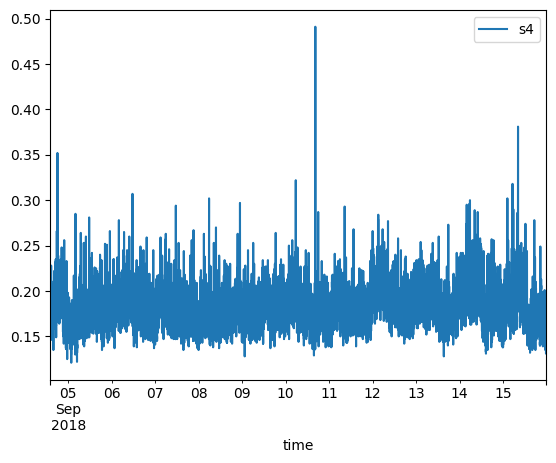

In [24]:
data = pd.read_csv('/home/lemateus/TCC/cintilacao/data/PRU2_2018-09-01_2018-09-15_9464c9cda8dce80d71af4c0f7524355bEDITADO.csv', na_values=[' ', ''])

data['time_utc'] = pd.to_datetime(data['time_utc'], format='%Y-%m-%d %H:%M:%S')
data = data.loc[data['time_utc']>='2018-09-04 14:10:00']
data = data[data[' svid'] == 131]
data = data[['time_utc', ' s4']]
data.columns = ['time', 's4']
data['s4'] = data['s4'].astype(float)
data.reset_index(drop=True, inplace=True)
data.plot(x='time', y='s4')
data.interpolate('linear')

In [25]:
x = data.drop(["s4"], axis=1)
y = data["s4"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

train_x = x_train
train_y = y_train

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print("Atributos: Treino", x_train.shape, "Teste", x_test.shape)
print("Valores: Treino", y_train.shape, "Teste", y_test.shape)

Atributos: Treino (11501, 1) Teste (4929, 1)
Valores: Treino (11501,) Teste (4929,)


In [55]:
gbr = DecisionTreeRegressor(criterion="squared_error", random_state=42)
gbr.fit(x_train, y_train)

y_predict = gbr.predict(x_test)
mean_squared_error(y_test, y_predict)
root_mean_squared_error(y_test, y_predict)
mean_absolute_error(y_test, y_predict)
r2_score(y_test, y_predict)

0.34389197457072573

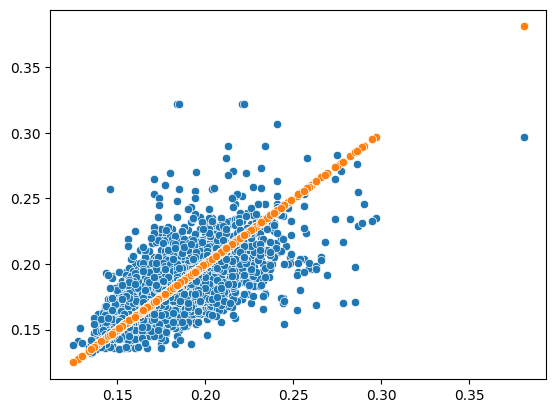

array([0.182, 0.153, 0.187, ..., 0.145, 0.175, 0.147])

In [64]:
# plt.figure(figsize=(18, 9))

sns.scatterplot(x=y_test, y=y_predict)
sns.scatterplot(x=y_test, y=y_test)

# plt.savefig("gbr_scatter.svg", formatstr="svg")
plt.show()
y_train

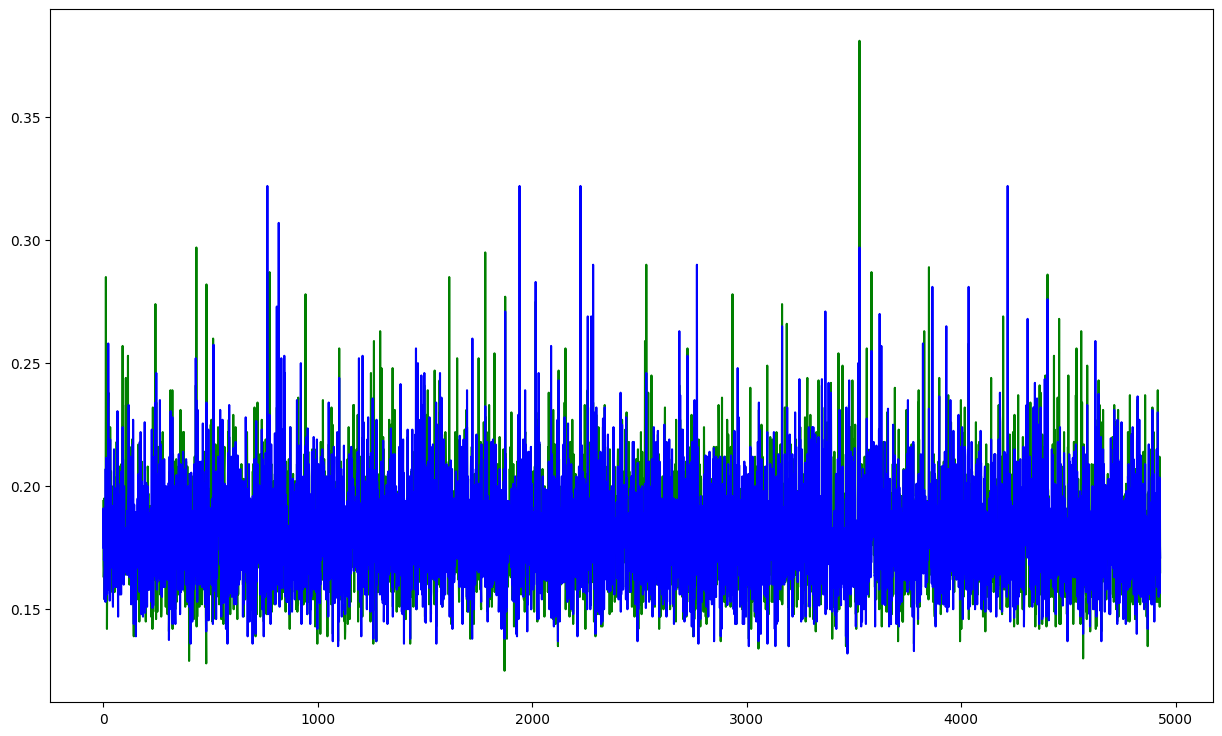

In [68]:
# plt.figure(figsize=(18, 9))

# sns.scatterplot(y=y_predict, x=range(y_predict.size))
# sns.scatterplot(y=y_test, x=range(y_test.size))
# sns.

# # plt.savefig("gbr_scatter.svg", formatstr="svg")
# plt.show()
from matplotlib import pyplot
plt.figure(figsize=(15, 9))
pyplot.plot(y_test, color='green')
pyplot.plot(y_predict, color='blue')
pyplot.show()

In [74]:
from skopt import gp_minimize
from skopt.utils import use_named_args

# def fitness(params):
#     learning_rate = params[0]
#     n_estimators = params[1]
#     min_samples_split = params[2]
#     min_samples_leaf = params[3]

#     model_gbr = GradientBoostingRegressor(learning_rate=learning_rate,
#                                         n_estimators=n_estimators,
#                                         min_samples_split=min_samples_split.astype(int),
#                                         min_samples_leaf=min_samples_leaf.astype(int),
#                                         random_state=42)

#     model_gbr.fit(x_train, y_train)
#     gbr_predict = model_gbr.predict(x_test)
#     return mean_squared_error(y_test, gbr_predict)

# space = [(1e-2, 1e-1), # learning_rate
#          (1, 1000), # n_estimators
#          (2, 100), # min_samples_split
#          (1, 100)] # min_samples_leaf, # subsample, # max_features

# resultado_gp = gp_minimize(fitness, space, random_state=42, n_calls=20, n_random_starts=10, verbose=1)

# print(resultado_gp.x)
# print(resultado_gp.fun)



from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline

param_distributions = {
   "splitter":["best","random"],
    "max_depth" : [1,3,5,7,9,11,12,None],
    "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
    "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
    "max_features":["log2","sqrt",None],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
 }

# pipe_gbr = Pipeline(steps=[
# #    ("preprocessor", preprocessor),
#    ("classifier", GradientBoostingRegressor(random_state=42))
#  ])

gs_gbr = (GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_distributions, scoring='neg_mean_absolute_error',))

gs_gbr = gs_gbr.fit(train_x, train_y)
gs_gbr.best_estimator_

DecisionTreeRegressor(max_features='log2', min_samples_leaf=4, random_state=42)

0.0002680516877520134
0.016372284133620862
0.011996285266659582
0.4435447220025912


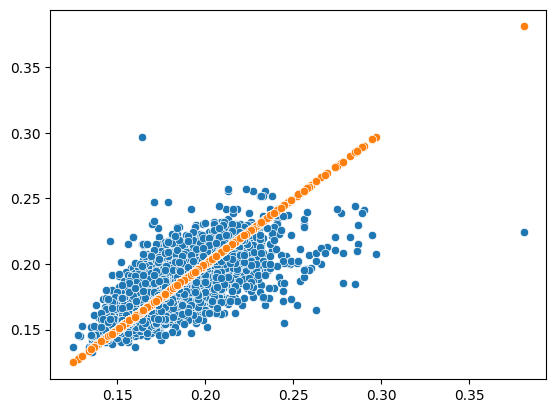

In [76]:
clf = DecisionTreeRegressor(max_features='log2', min_samples_leaf=4, random_state=42)

clf.fit(x_train, y_train)

y_predict = clf.predict(x_test)
# print(mean_squared_error(y_predict, y_test))
print(mean_squared_error(y_test, y_predict))
print(root_mean_squared_error(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(r2_score(y_test, y_predict))
# plt.figure(figsize=(18, 9))

sns.scatterplot(x=y_test, y=y_predict)
sns.scatterplot(x=y_test, y=y_test)

# plt.savefig("gbr_scatter.svg", formatstr="svg")
plt.show()

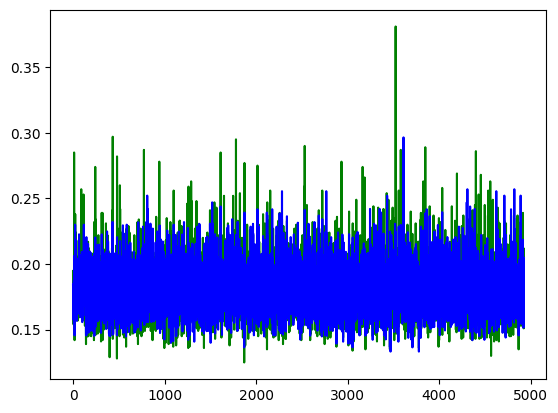

In [73]:
pyplot.plot(y_test, color='green')
pyplot.plot(y_predict, color='blue')
pyplot.show()